## Transformations


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import boxcox
from scipy.fft import fft

In [2]:
data = pd.read_csv("Alcohol_Sales.csv", index_col="DATE", parse_dates=True)

In [3]:
data.info

<bound method DataFrame.info of             S4248SM144NCEN
DATE                      
1992-01-01            3459
1992-02-01            3458
1992-03-01            4002
1992-04-01            4564
1992-05-01            4221
...                    ...
2018-09-01           12396
2018-10-01           13914
2018-11-01           14174
2018-12-01           15504
2019-01-01           10718

[325 rows x 1 columns]>

In [4]:
data.columns = ["Sales"]

In [5]:
data.head()

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


<AxesSubplot:xlabel='DATE'>

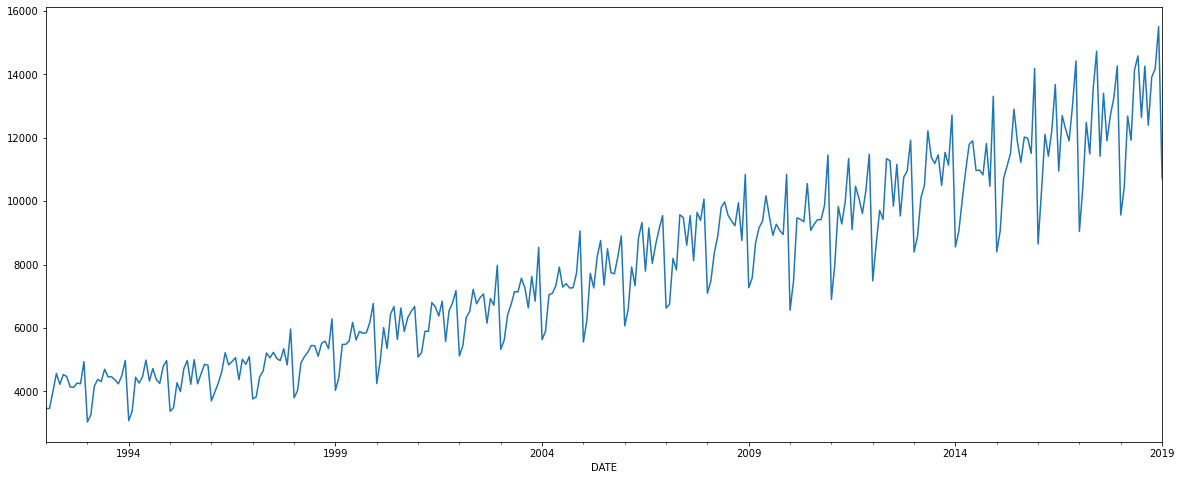

In [6]:
data["Sales"].plot(figsize=(20,8))

1) Square-root Transformation

In [1]:
# There are some Machine Learning models that can describe linear data better than quadratic or cubic growing data 

In [7]:
data["SqrtSales"] = np.sqrt(data["Sales"])

<AxesSubplot:xlabel='DATE'>

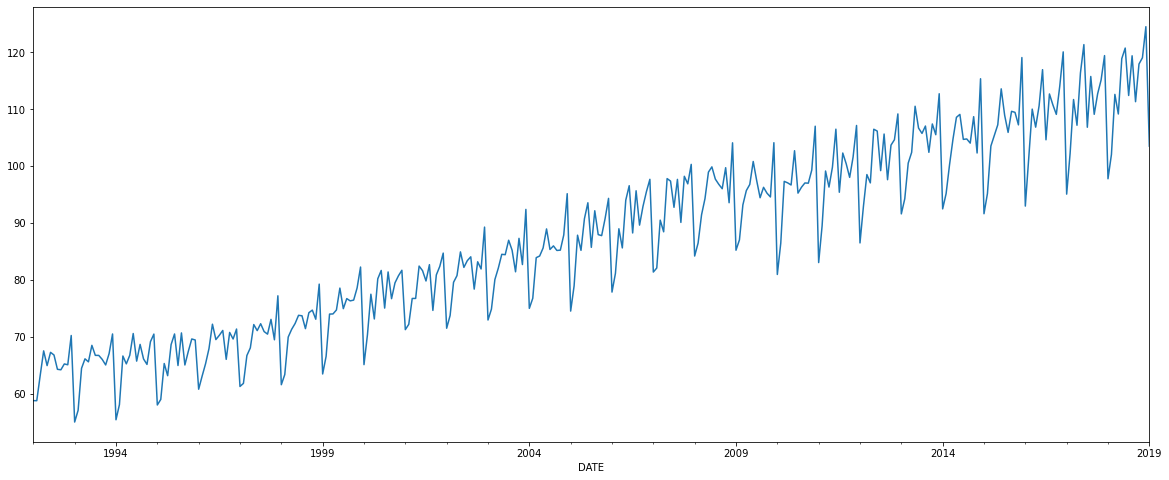

In [8]:
data["SqrtSales"].plot(figsize=(20,8))

2) Log-Transformation

In [5]:
# It is common in finance to model prices following a log-normal distribution.
# Decibel scale is a log-transformation

In [9]:
data["LogSales"] = np.log(data["Sales"]) 

<AxesSubplot:xlabel='DATE'>

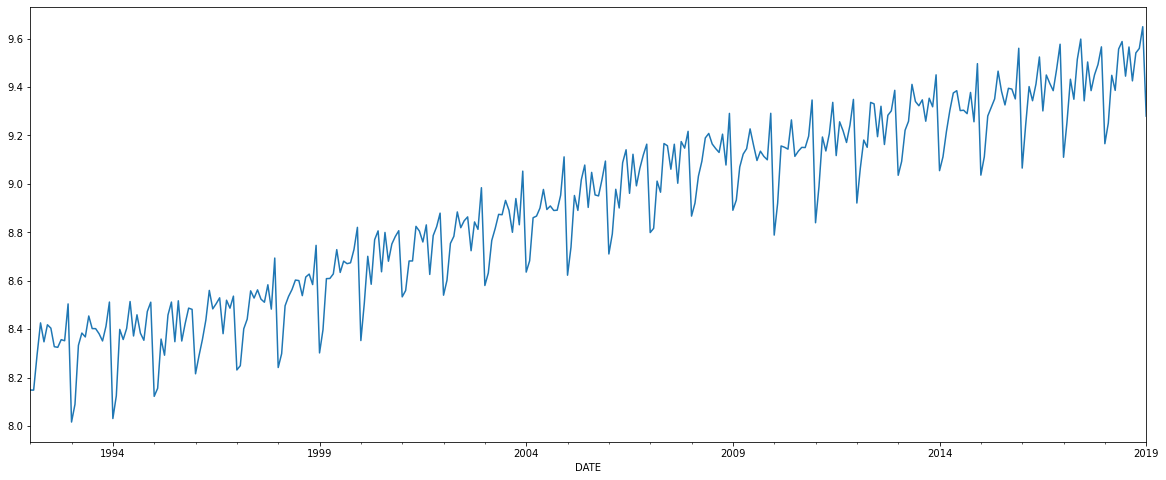

In [10]:
data["LogSales"].plot(figsize=(20,8))

3) Box-Cox Transformation

In [4]:
# Box-Cox transform in between the square-root transformation and the log transformation
# The hyperparameter controls the direction of the transformation

In [10]:
bc, lam = boxcox(data["Sales"])
print(lam)

0.2359961978310507


<AxesSubplot:xlabel='DATE'>

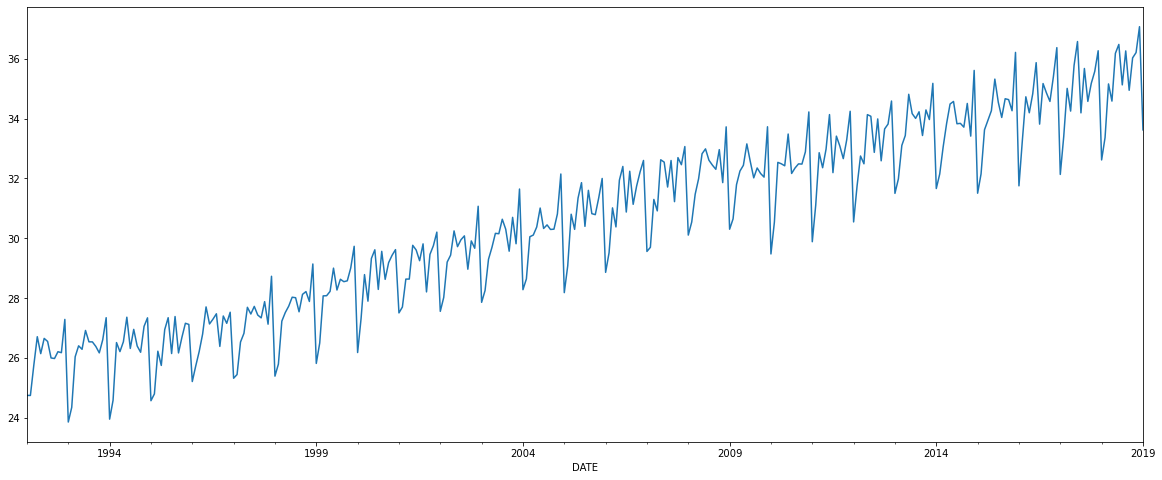

In [11]:
data["BoxCoxSales"] = bc
data["BoxCoxSales"].plot(figsize=(20,8))

4) Difference Transformation

In [6]:
# The differencing transformation will be useful when we look at stationary time series
# This transformation sets the mean to around 0

In [13]:
def diff_trans(data):
    diff = []
    diff.append(0)
    for i in range(1,len(data)):
        diff.append(data[i]-data[i-1])
    return diff

In [14]:
data["DiffSales"] = diff_trans(data["Sales"])

<AxesSubplot:xlabel='DATE'>

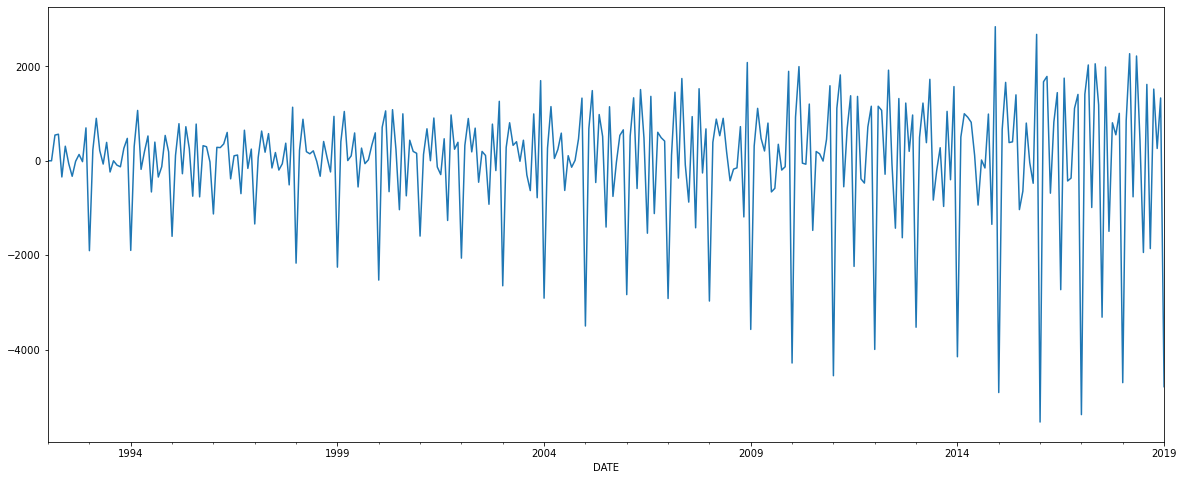

In [15]:
data["DiffSales"].plot(figsize=(20,8))

5) Normalization

In [7]:
# Squashes the time series between 0-1

In [16]:
data["NormSales"] = (data["Sales"] - np.min(data["Sales"]))/(np.max(data["Sales"]) - np.min(data["Sales"]))

<AxesSubplot:xlabel='DATE'>

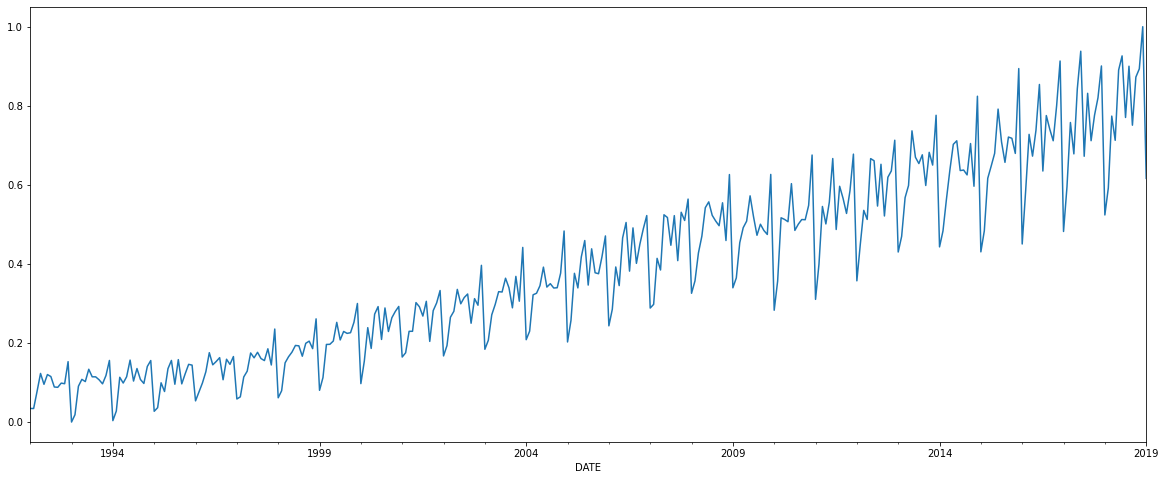

In [17]:
data["NormSales"].plot(figsize=(20,8))

6) Standartization

In [8]:
# The standartized time series follows a normal distribution with mean 0 and standard deviation 1

In [18]:
data["StanSales"] = (data["Sales"] - np.mean(data["Sales"]))/ np.std(data["Sales"])

<AxesSubplot:xlabel='DATE'>

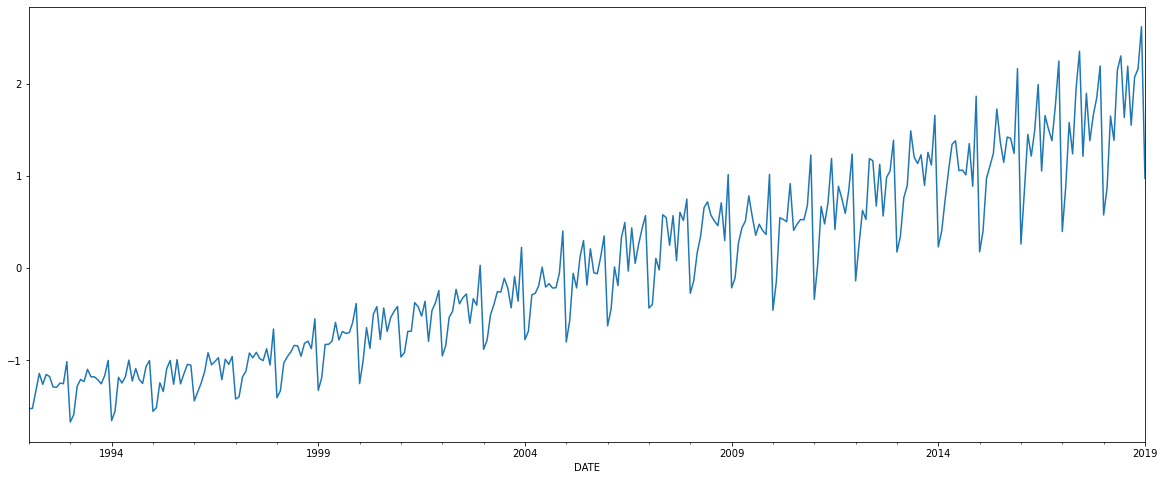

In [19]:
data["StanSales"].plot(figsize=(20,8))